- Interpolations lineaires et non lineaire
- Optimization / minimization
- Transformation de Fourier


# SCIPY (optimize, Fourier, ndimage)

[video 16](https://www.youtube.com/watch?v=P0Xr5TIML8U)

[doc. scipy](https://docs.scipy.org/doc/scipy/reference/)

## Interpolate (inter-[Paulettes](https://www.youtube.com/watch?v=EfHwSSKmG40))

Quand on a des donnees qui paraissent incomplete par rapport a d'autres (e.g 1 capteur prend des donnees toutes les secondes, un autre, toutes les 3 secondes)

[doc. inperp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

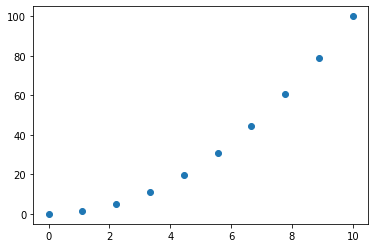

In [4]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0,10,10) #dix points au hasard entre 0 et 10
y = x**2
plt.scatter(x,y)

In [5]:
from scipy.interpolate import interp1d #va nous permettre de generer une autre fonction qui sera la fonction d'interpolation

### Interpolation lineaire

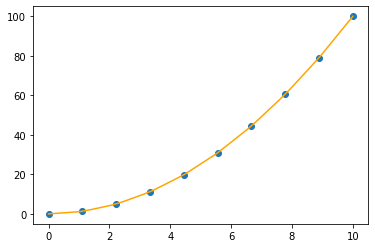

In [11]:
f = interp1d(x, y, kind='linear') # cree notre fonction d'interpolation
# qu'on va pouvoir appliquer a un x plus grand
new_x = np.linspace(0,10,30)
result = f(new_x)
plt.figure()
plt.plot(new_x, result, c='orange')
plt.scatter(x, y)
plt.show()


__Attention : Une interpolation ne doit pas cacher la realite.__

Entre nos differents points de mesures, en bleu, peut-etre que la courbe fait des zigzag

### Interpolation non lineaire

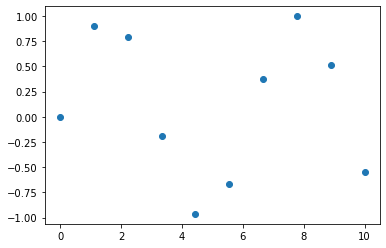

In [13]:
x = np.linspace(0,10,10)
y = np.sin(x)

plt.scatter(x, y)

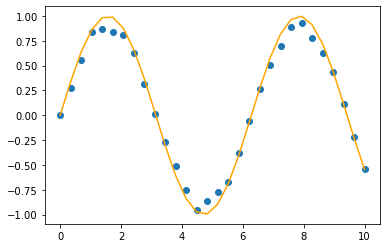

In [16]:
g = interp1d(x, y, kind='linear')
plt.figure()
plt.scatter(new_x, g(new_x))
plt.plot(new_x, np.sin(new_x), c='orange')
# L'interpolation lineraire de sinus n'est pas ouf

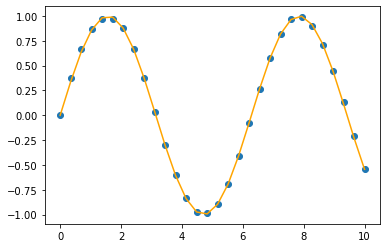

In [17]:
g = interp1d(x, y, kind='cubic')
plt.figure()
plt.scatter(new_x, g(new_x))
plt.plot(new_x, np.sin(new_x), c='orange')
# L'interpolation cubic est bg

__Necessite de comprendre les interpolations en mathematiques__

## Optimize

[doc optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html?highlight=optimize#module-scipy.optimize)

- curve_fit
- minimisation
- programmation lineaire

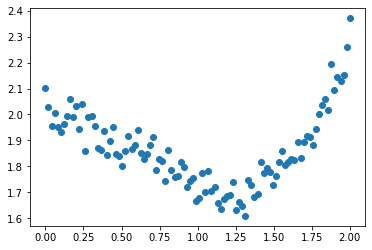

In [18]:
x = np.linspace(0,2,100)
y = 1/3*x**3 - 3/5*x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

### Curve fit

Se sert de la methode des moindres carres pour trouver les bons parametres d'un modele f

__Il faut donc d'abord definir un model__ (type une fonction polynomiale)

In [20]:
# definition de notre modele polynomial
def f(x, a, b, c, d) :
    return a * x**3 + b * x**2 + c*x + d

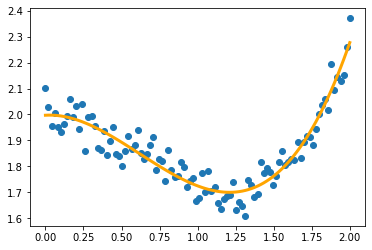

In [28]:
from scipy import optimize

param_modele, covariance_mat = optimize.curve_fit(f, x, y)
# Retourne deux tableaux numpy
# 1, les parametres de notre modele (a, b, c, d)
# 2, les covariances entre ces parametres

plt.figure()
plt.scatter(x, y)
plt.plot(x, f(x, param_modele[0], param_modele[1], param_modele[2], param_modele[3]), c='orange', lw=3)
plt.show()


__plutot utiliser [scikit learn](https://scikit-learn.org/stable/)__

## Minimize

Choix de l'algorithme possible avec l'argument method = ...

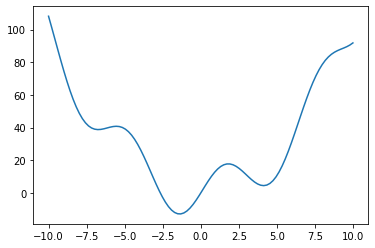

In [30]:
def f(x) :
    return x**2 + 15*np.sin(x)

x = np.linspace(-10, 10, 100)
plt.figure()
plt.plot(x, f(x))
plt.show()

# On remarque que la fonction a plusieurs minimum

In [31]:
optimize.minimize(f, x0 = -8)
# Effectue un algorithme de minimisation, selon un point de depart x0 (minimum local) qui va peut a peu converger vers le premier minimum qu'il rencontre

# ici, vers -6.7

      fun: 38.81120617595851
 hess_inv: array([[0.11637184]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-6.73789948])

In [33]:
minglob = optimize.minimize(f, x0 = -4.5).x
minglob
# ici, vers -1.38

array([-1.38505605])

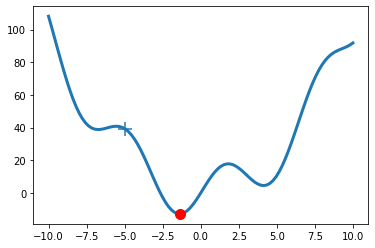

In [36]:
plt.figure() # figsize=(12,8)
# On trace la courbe
plt.plot(x, f(x), lw= 3, zorder = -1)
# On place le min
plt.scatter(minglob, f(minglob), s=100, c='r', zorder=1)
# On place le point de dep
plt.scatter(-5, f(-5), s=200, marker='+', zorder=1)

plt.show()

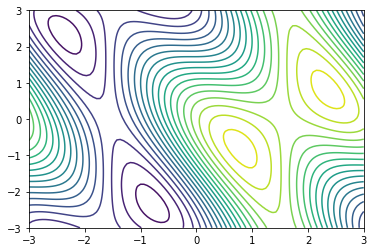

In [39]:
def f(x) :
    return np.sin(x[0]) + np.cos(x[0] + x[1]) * np.cos(x[0])

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x, y = np.meshgrid(x, y)

plt.figure()
plt.contour(x, y, f(np.array([x,y])), 20)
plt.show()

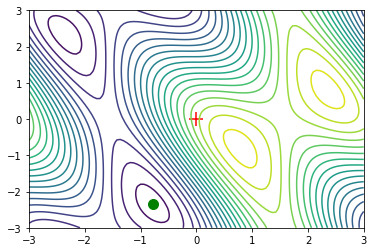

In [48]:
# on va initier notre x0 avec 2 dimensions
xy0 = np.zeros((2,1))
minloc = optimize.minimize(fun=f, x0=xy0).x

plt.figure()
plt.contour(x, y, f(np.array([x,y])), 20)
plt.scatter(xy0[0], xy0[1], s=200, marker='+', c= 'r')
plt.scatter(minloc[0], minloc[1], s= 100, c='g')
plt.show()

## Signal FFT

[scipy signal processing](https://docs.scipy.org/doc/scipy/reference/signal.html?highlight=signal%20processing#module-scipy.signal)

[Discrete Fourier Transformation](https://docs.scipy.org/doc/scipy/reference/fftpack.html?highlight=fftpack#module-scipy.fftpack)

### Detrending

Enelever la composante lineaire

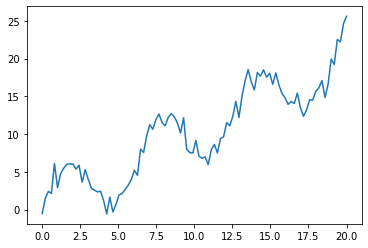

In [54]:
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])

plt.figure()
plt.plot(x, y)
plt.show()

In [51]:
from scipy import signal

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


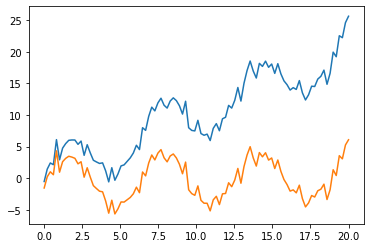

In [55]:
detrended = signal.detrend(y)

plt.figure()
plt.plot(x, y)
plt.plot(x, detrended)
plt.show()

### Transformation de Fourier

__Analyse les frequence presentes dans un signal periodique__

__= un spectre__

Un signal periodique peut etre la composee de signaux periodique de base, mais a des frequences differentes

Le spectre donne en abscisses des frequences, et en ordonnees de amplitudes

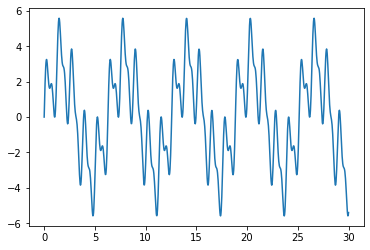

In [56]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.figure()
plt.plot(x, y)
plt.show()

In [57]:
from scipy import fftpack

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


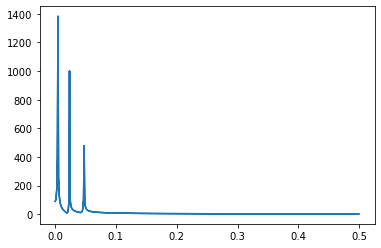

In [63]:
fourier = fftpack.fft(y) # retourne le signal avec des valeurs complexes
# il faut travailler en valeur absolue
power = np.abs(fourier)
frequence = fftpack.fftfreq(y.size) #fftfreq prend le nombre d'elements en parametres
plt.figure()
# On va tout tracer en valeur absolue pour un graph plus claire, puisque les signaux periodique sont simetriques
plt.plot(np.abs(frequence), power)
plt.show()

#### Traitement d'un signal bruite

Ce genre de transformation permet de filtrer le bruit d'un signal

- On va recuperer toutes les frequences qui sont une composante du signal,
- on va avoir un spectre avec beaucoup d'element 
- on va filtrer celles dont l'amplitude n'atteint pas un certain seuil
- Et on va ne conserver que ces dernieres (transformation de fourier inverse)

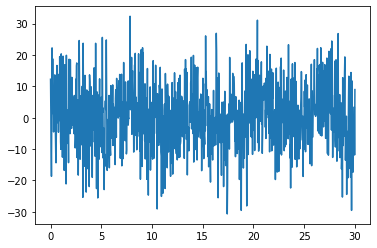

In [102]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.randn(x.shape[0])*10 # ce dernier element est une representation du bruit
plt.figure()
plt.plot(x, y)
plt.show()

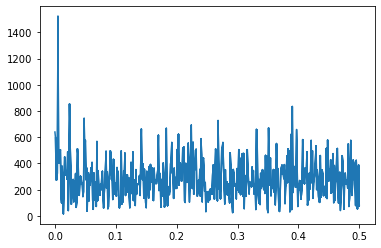

In [103]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequence = fftpack.fftfreq(y.size)

plt.figure()
plt.plot(np.abs(frequence), power)
plt.show()

In [104]:
# Filtrage de toutes les valeurs inferieures a un certain seuil
fourier[power < 800] = 0

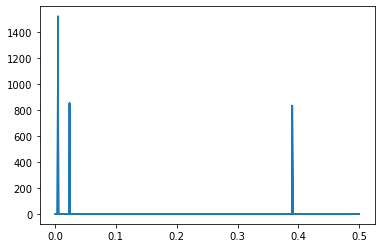

In [105]:
power = np.abs(fourier)
frequence = fftpack.fftfreq(y.size)

plt.figure()
plt.plot(np.abs(frequence), power)
plt.show()

/home/maximorose/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


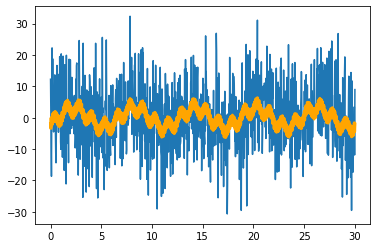

In [107]:
filtered_signal = fftpack.ifft(fourier)

plt.figure()
plt.plot(x, y)
plt.plot(x, filtered_signal, c='orange', lw=3)
plt.show()

## ND Image

[multidimensional image processing](https://docs.scipy.org/doc/scipy/reference/ndimage.html?highlight=ndimage#module-scipy.ndimage)

### Morphology

Technique mathematique qui permet de deformer des matrices, donc des images

On definit une structure, souvent une croix. Cette structure va se deplacer sur toute notre image. Lorsque la structure repere un pixel blanc, par exemple, elle va effectuer un certaines actions :
- dilatation : imprime des pixels
- erosion : efface des pixels

In [108]:
from scipy import ndimage

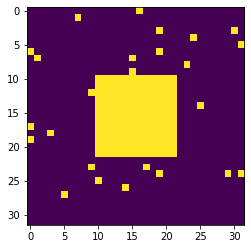

In [109]:
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0,32, 30), np.random.randint(0,32,30)] = 1
plt.imshow(X)

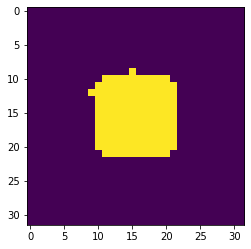

In [110]:
# Binary opening est la combinaison entre une dilation et une erosion
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)
# Clean mais endommage la structure de l'image

### Application pratique

Sur image : assets/scipy_image_app.png

- Extraire les cellules de l'arriere plan
- enlever quelques artefact sur la photo
- On va mesurer la taille des bacteries sur chacune de ces photos

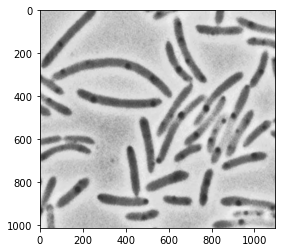

(1013, 1095, 4)

In [119]:
imgtst = plt.imread('assets/scipy_image_app.png')
plt.imshow(imgtst)
plt.show()
imgtst.shape

#### 1. Tu convertis en noir et blanc

In [120]:
# Image a 3 dimension, on va la reduire a une image en 2d
imgtst = imgtst[:,:,0]

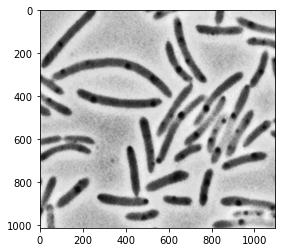

(1013, 1095)

In [121]:
plt.imshow(imgtst, cmap='gray') # sans le cmap='gray', on a de belles couleurs vertes
plt.show()
imgtst.shape

#### 2. Tu visualise le seuil de luminosite interessant pour filtrer

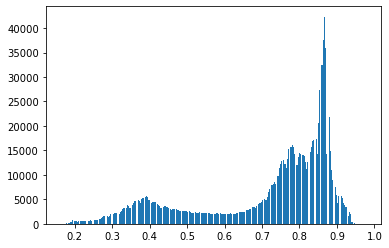

In [124]:
image_2 = np.copy(imgtst)
plt.figure()
plt.hist(image_2.ravel(), bins=255) # 255 pour avoir toutes les nuances de pixels
plt.show()
# On identitifie bien 3 zones d'intensite distinctes

#### 3. Tu filtres et ajuste le seuil

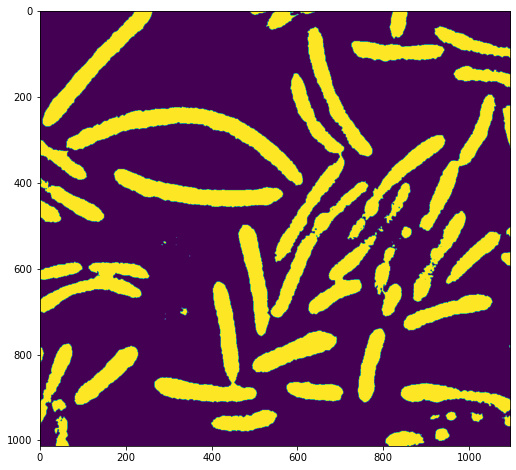

In [132]:
filtre_cells = imgtst < 0.6 # avec 0.5 on a des bacteries un peu imparfaites, avec 0.6 on a des artefact non voulus
plt.figure(figsize=(12, 8))
plt.imshow(filtre_cells)
plt.show()

#### 4. Tu fais un peu de morphologie pour supprimer les artefacts

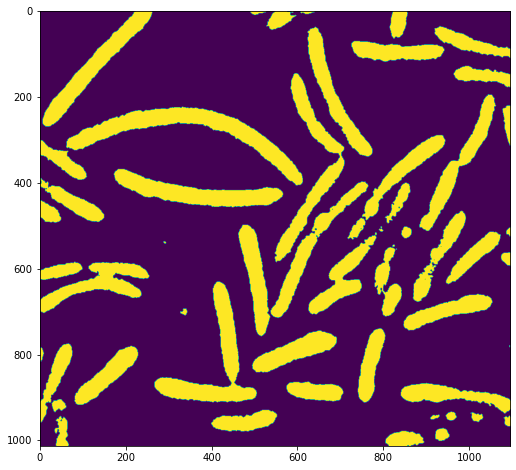

In [133]:
open_img = ndimage.binary_opening(filtre_cells)
plt.figure(figsize=(12, 8))
plt.imshow(open_img)
plt.show()

#### 5. Tu labellises chacune des bacteries

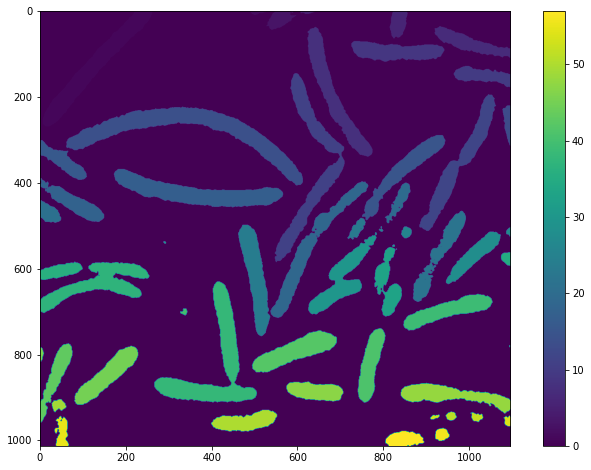

Nombre de labals :  57


In [137]:
label_img, n_labels = ndimage.label(open_img)

plt.figure(figsize=(12, 8))
plt.imshow(label_img)
plt.colorbar()
plt.show()

print('Nombre de labals : ', n_labels)

#### 5. Tu mesures chacune des bacteries sur la photo

Tu retourne la taille de chacun des 57 elements identifies sur la photo

(une taille relative des une par rapport aux autres)

(57,)


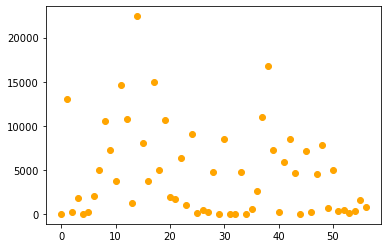

In [144]:
sizes = ndimage.sum(open_img, label_img, range(n_labels))
print(sizes.shape)

plt.figure()
plt.scatter(range(n_labels), sizes, c='orange')
plt.show()


#### VOILA ! On a un dataset. On pourrait commencer a faire des moyennes, des statistiques, etc.

##### SCIPY est important pour filtrer les donees qu'on fournit a une machine pour qu'elle apprenne. On peut et on doit cleaner les donnees